<a href="https://colab.research.google.com/github/jagadeeshkadal/DataAnalyticsInternship-codetechit/blob/master/Task_2%5Bpredictive_Analysis%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task: Predictive Analysis Using Machine Learning

### Aim
The goal of this project is to build a regression-based machine learning model that can predict the duration of a movie (in minutes) based on various features from a real-world dataset.

---

### Dataset
We are using the open-source dataset from Netflix, which contains information about movies and TV shows available on the platform. The dataset includes attributes such as:

- Title  
- Director  
- Cast  
- Country  
- Date added  
- Release year  
- Rating  
- Duration  
- Genre (listed_in)  
- Description  
- Type (Movie/TV Show)

---

### Problem Statement
We aim to predict the duration (in minutes) of a movie using the other available features like:

- Director  
- Country  
- Release year  
- Genre  
- Rating  
- and more

> We will exclude TV Shows because their durations are not in minutes (e.g., "2 Seasons", "1 Season"), which would not be meaningful for numerical regression.

---

### What Will We Do?
Our machine learning pipeline will involve:

1. Data Understanding and Preprocessing
   - Load and explore the dataset
   - Filter only movies
   - Convert duration to numeric
   - Handle missing values and categorical features

2. Feature Selection and Encoding
   - Use relevant features
   - Apply encoding to categorical columns

3. Model Building
   - Split data into training and testing sets
   - Train regression models like:
     - Linear Regression
     - Random Forest Regressor (for comparison)

4. Model Evaluation
   - Evaluate using metrics like:
     - Mean Absolute Error (MAE)
     - Root Mean Squared Error (RMSE)
     - R² Score

---

##Expected Outcome
A regression model that can reasonably predict how long a movie is in minutes, based on its metadata.


---

Step 1: Install Required Libraries and Load Dataset

In [1]:
# Install necessary libraries
!pip install -q pandas numpy matplotlib seaborn scikit-learn

# Download the dataset
!wget -q https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/netflix_titles.csv

# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Step 2: Load & Explore Data

In [2]:
# Load dataset
df = pd.read_csv("netflix_titles.csv")

# Display first 5 rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


Step 3: Filter Only Movies and Preprocess Duration

In [3]:
# Filter only movies
movies_df = df[df['type'] == 'Movie'].copy()

# Extract numeric duration (e.g., "90 min" → 90)
movies_df['duration'] = movies_df['duration'].str.extract('(\d+)').astype(float)

# Drop rows with missing duration
movies_df = movies_df.dropna(subset=['duration'])

# Drop unnecessary columns
movies_df = movies_df.drop(columns=['show_id', 'title', 'cast', 'description', 'date_added'])

# Show cleaned dataset
movies_df.head()

,type,director,country,release_year,rating,duration,listed_in
0,Movie,"Richard Finn, Tim Maltby","United States, India, South Korea, China",2019,TV-PG,90.0,"Children & Family Movies, Comedies"
1,Movie,NaN,United Kingdom,2016,TV-MA,94.0,Stand-Up Comedy
4,Movie,Fernando Lebrija,United States,2017,TV-14,99.0,Comedies
6,Movie,Gabe Ibáñez,"Bulgaria, United States, Spain, Canada",2014,R,110.0,"International Movies, Sci-Fi & Fantasy, Thrillers"
7,Movie,"Rodrigo Toro, Francisco Schultz",Chile,2017,TV-MA,60.0,Stand-Up Comedy


Step 4: Handle Missing Values and Encode Categorical Features


In [4]:

# Fill missing values
movies_df['director'] = movies_df['director'].fillna('Unknown')
movies_df['country'] = movies_df['country'].fillna('Unknown')
movies_df['rating'] = movies_df['rating'].fillna('Unknown')

# Label encoding for categorical columns
le = LabelEncoder()
for col in ['director', 'country', 'rating', 'listed_in']:
    movies_df[col] = le.fit_transform(movies_df[col])

# Display after encoding
movies_df.head()

,type,director,country,release_year,rating,duration,listed_in
0,Movie,2452,437,2019,9,90.0,68
1,Movie,3033,330,2016,8,94.0,247
4,Movie,909,388,2017,6,99.0,114
6,Movie,948,45,2014,5,110.0,237
7,Movie,2528,66,2017,8,60.0,247


Step 5: Split Data for Training


In [5]:

# Features and Target
X = movies_df.drop(columns=['duration', 'type'])
y = movies_df['duration']

# Split into train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step 6: Train Linear Regression Model

In [6]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)


Step 7: Train Random Forest Regressor

In [7]:
# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)


Step 8: Evaluate Models

In [8]:
# Evaluation Function
def evaluate_model(y_true, y_pred, name):
    print(f"📊 {name} Performance:")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R² Score:", r2_score(y_true, y_pred))
    print()

# Evaluate both
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")


📊 Linear Regression Performance:
MAE: 18.476409996433247
RMSE: 24.55022324657106
R² Score: 0.17726412543560355

📊 Random Forest Regressor Performance:
MAE: 13.793155336229486
RMSE: 18.930241978268334
R² Score: 0.5108276802698373



Improvements
---
Feature Importance (Random Forest)


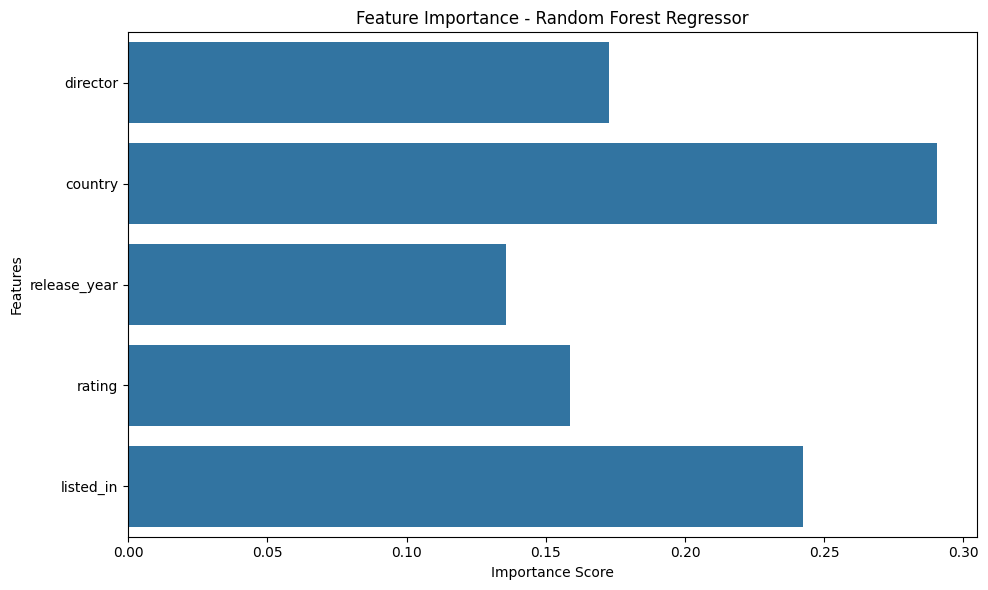

In [9]:

# Feature importance visualization
import seaborn as sns

importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance - Random Forest Regressor")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

 Predicted vs Actual Duration Plot

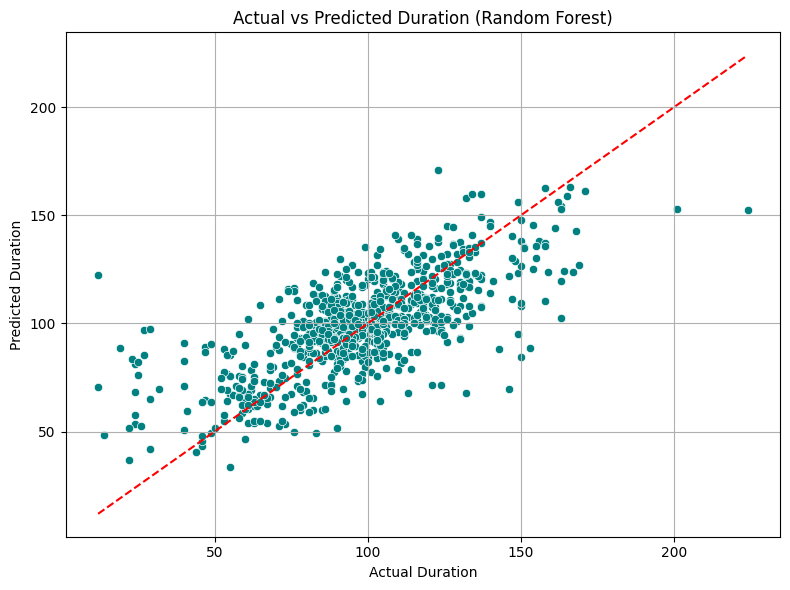

In [10]:
# Visualizing predicted vs actual
y_pred_rf = rf_model.predict(X_test)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual Duration')
plt.ylabel('Predicted Duration')
plt.title('Actual vs Predicted Duration (Random Forest)')
plt.grid(True)
plt.tight_layout()
plt.show()


### Conclusion:

- We built a regression model to predict movie duration based on features like release year, country, rating, and description length.
- Two models were tested: Linear Regression and Random Forest Regressor
- Random Forest performed better with higher R² and lower error values.
- Feature importance suggests that release year and description length are strong predictors of movie duration.
- The model can be further improved by:
  - Adding more numerical features (e.g., cast/genre encoding)
  - Removing outliers or binning durations
  - Performing hyperparameter tuning
